## Risk Bottle Simulation

Taks was to created a program which will simulate 1000 individual battle rounds in Risk board game with 3 attackers and  2 defenders and plot the results. Each battle round involves rolling dice for both the attacker and defender, comparing the rolls and determining the number of units lost by each side.

The attacker rolls up to three dice and the defender rolls up to two dice. The highest rolls from each side are compared and if the attackers dice is the same or lower they loose, otherwise defender loose. The next two highest dice needs to be copare also.

#### Importing necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Setting up function which will simulate one battle round.

In [2]:
def battle():
    # attacker rolls 3 dice, defender rolls 2 dice
    attacker = sorted(np.random.randint(1, 7, 3), reverse=True)
    defender = sorted(np.random.randint(1, 7, 2), reverse=True)
    
    # setting up initial results to zero
    attacker_loss = 0
    defender_loss = 0
    
    # now comparing the first highest dice 
    if attacker[0] > defender[0]:
        defender_loss += 1
    else:
        attacker_loss += 1
    
    # this will compare second highest dice
    if attacker[1] > defender[1]:
        defender_loss += 1
    else:
        attacker_loss += 1
    
    return attacker_loss, defender_loss

#### Simulation for 1000 rounds.

In [3]:
# simulation for 1000 rounds
rounds = 1000
results = [battle() for _ in range(rounds)]

# resunts are saved in two separate lists
attacker_loss = [result[0] for result in results]
defender_loss = [result[1] for result in results]

# this will count the number of different scenarios
options = {"Attacker loses 2": 0, "Each loses 1": 0, "Defender loses 2": 0}
for a_loss, d_loss in results:
    if a_loss == 2:
        options["Attacker loses 2"] += 1
    elif a_loss == 1 and d_loss == 1:
        options["Each loses 1"] += 1
    elif d_loss == 2:
        options["Defender loses 2"] += 1

#### Creating a bar chart with the different scenario results.

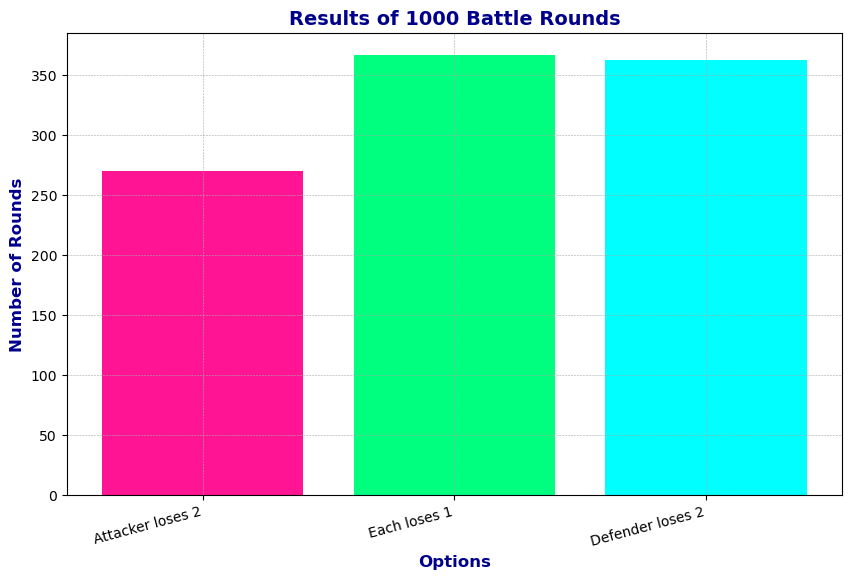

In [4]:
# ploting results
x = list(options.keys())
y = list(options.values())
col = ['deeppink', 'springgreen', 'aqua']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x,y, color = col)
ax.set_title ("Results of 1000 Battle Rounds", color ='darkblue', size = 14, weight="bold")
ax.set_xlabel("Options", color ='darkblue', fontsize = 12, weight="bold")
ax.set_ylabel("Number of Rounds", color ='darkblue', fontsize = 12, weight="bold")

labels = ax.get_xticklabels()
plt.setp(labels, rotation=15, horizontalalignment='right')
ax.grid(linestyle="--", linewidth=0.4, color='darkgrey', zorder=-15)

plt.show()

### End